## Singular Value Decomposition
---
**Elo notes**


In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any $m × n$ matrix via an extension of polar decomposition. It has many useful applications in signal processing and statistics.

**  SVD is a technique for both improving the quality of a recommendation as well as handling sparse data is matrix factorization.**

#### Latent variable - Latent feature

In statistics, latent variables (from Latin: present participle of lateo (“lie hidden”), as opposed to observable variables), are variables that are not directly observed but are rather inferred (through a mathematical model) from other variables that are observed (directly measured). Mathematical models that aim to explain observed variables in terms of latent variables are called latent variable models. 

Sometimes latent variables correspond to aspects of physical reality, which could in principle be measured, but may not be for practical reasons. In this situation, the term hidden variables is commonly used (reflecting the fact that the variables are "really there", but hidden). Other times, latent variables correspond to abstract concepts, like categories, behavioral or mental states, or data structures. The terms hypothetical variables or hypothetical constructs may be used in these situations.

One advantage of using latent variables is that it reduces the dimensionality of data. A large number of observable variables can be aggregated in a model to represent an underlying concept, making it easier to understand the data. In this sense, they serve a function similar to that of scientific theories. At the same time, latent variables link observable ("sub-symbolic") data in the real world to symbolic data in the modeled world.

Latent variables, as created by factor analytic methods, generally represent "shared" variance, or the degree to which variables "move" together. Variables that have no correlation cannot result in a latent construct based on the common factor model.

#### Singular value decomposition

The principal components transformation can also be associated with another matrix factorization, the singular value decomposition $(SVD)$ of $X$,

${\displaystyle \mathbf {X} =\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}} $

Here $Σ$ is an n-by-p rectangular diagonal matrix of positive numbers $σ(k)$, called the singular values of $X$; $U$ is an n-by-n matrix, the columns of which are orthogonal unit vectors of length n called the left singular vectors of $X$; and W is a p-by-p whose columns are orthogonal unit vectors of length p and called the right singular vectors of $X$.

In terms of this factorization, the matrix $X^T X$ can be written

${\displaystyle {\begin{aligned}\mathbf {X} ^{T}\mathbf {X} &=\mathbf {W} \mathbf {\Sigma } \mathbf {U} ^{T}\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\Sigma } ^{2}\mathbf {W} ^{T}\end{aligned}}} $

Comparison with the eigenvector factorization of $X^T X$ establishes that the right singular vectors $W$ of $X$ are equivalent to the eigenvectors of $X^T X$, while the singular values $σ(k)$ of $Σ$ are equal to the square roots of the eigenvalues $λ(k)$ of $X^TX$.

Using the singular value decomposition the score matrix T can be written

${\displaystyle {\begin{aligned}\mathbf {T} &=\mathbf {X} \mathbf {W} \\&=\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\mathbf {W} \\&=\mathbf {U} \mathbf {\Sigma } \end{aligned}}} $

so each column of $T$ is given by one of the left singular vectors of $X$ multiplied by the corresponding singular value. This form is also the polar decomposition of $T$.

Efficient algorithms exist to calculate the $SVD$ of $X$ without having to form the matrix $X^TX$, so computing the $SVD$ is now the standard way to calculate a principal components analysis from a data matrix[citation needed], unless only a handful of components are required.

As with the eigen-decomposition, a truncated $n × L$ score matrix $TL$ can be obtained by considering only the first L largest singular values and their singular vectors:

${\displaystyle \mathbf {T} _{L}=\mathbf {U} _{L}\mathbf {\Sigma } _{L}=\mathbf {X} \mathbf {W} _{L}}$

The truncation of a matrix $M$ or $T$ using a truncated singular value decomposition in this way produces a truncated matrix that is the nearest possible matrix of rank L to the original matrix, in the sense of the difference between the two having the smallest possible Frobenius norm, a result known as the Eckart–Young theorem [1936].

In [16]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

from sklearn import cluster, datasets, decomposition
from sklearn import random_projection, preprocessing
from sklearn import ensemble, lda, manifold
from sklearn.manifold import MDS

from numpy.linalg import svd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sea
sea.set()

%matplotlib inline

#### The International Standard Book Number (ISBN) is a 13-digit number that uniquely identifies books and book-like products published internationally.

#### df :  Ratings : Book Ratings

In [17]:
df = pd.read_csv('data/book_reviews.csv', index_col=0)

In [18]:
df[:2]

,User-ID,ISBN,Book-Rating
1083,277195,0060391626,10
1084,277195,0060502258,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220995 entries, 1083 to 1149746
Data columns (total 3 columns):
User-ID        220995 non-null int64
ISBN           220995 non-null object
Book-Rating    220995 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.7+ MB


In [20]:
#df.describe()

In [21]:
df['Book-Rating'] = df['Book-Rating'].replace(0, -1)

In [22]:
df['User-ID'].isnull().sum()

0

In [23]:
df[:2]

,User-ID,ISBN,Book-Rating
1083,277195,0060391626,10
1084,277195,0060502258,-1


In [24]:
df.shape

(220995, 3)

In [25]:
mainmatrix = df.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(-1)

In [26]:
mainmatrix[:2]

ISBN,0006493580,000649840X,0006512135,0006513204,0006514855,0006547834,0006550576,0006550681,0006550789,0007110928,...,8495618605,8497593588,8804342838,8806142100,8806143042,8807813025,8817106100,8845205118,8873122933,8885989403
User-ID,,,,,,,,,,,,,,,,,,,,,
243,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
254,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [27]:
# International Standard Book Number : ISBN : feature names
feature_names = mainmatrix.columns

#### SVD - Singular Value Decomposition on mainmatrix

Let us define:

$A_k$ : MainMatrix

$S_k$ : Sigma

$A_k$ = $U_k$  $S_k$  $V_k^T$

* __m__: # of users
* __n__: # of items
* __k__: # of latent features (also rank of __A__)


* $A_k$ is our user-book rating matrix (__m__ x __n__)

    * **U** is our _weights_ matrix (__m__ x __k__)
    * **S** is our singular values matrix (__k__ x __k__)
    * and **V*** is our features matrix (__k__ x __n__)

The larger the singular value (**S** matrix), the more important that latent feature.  

Since **U** and **V** are orthogonal to each other, we can rearrange them in order of decreasing singular values.  If we want to reduce the dimension, we simply set a threshold for which columns/rows to cut off (low rank approximation):

You can think of the weights matrix **U** as representing how much of each latent feature corresponds to each user, and the features matrix **V** as how much of each item/rating contributes to the latent features.

In [28]:
u, sigma, v_t = svd(mainmatrix.values, full_matrices=False)

In [29]:
u.shape

(2500, 2500)

In [30]:
sigma.shape

(2500,)

In [31]:
v_t.shape

(2500, 6092)

#### Energy - Singular values are square roots of eigenvalues

Energy is the same as variance of a dimension and we can compute it simply by squaring the singular values.

singular values are square roots of eigenvalues

In [32]:
# energy is the sum of the energy of each singular value
energy = sigma**2
energy

array([  1.41978492e+07,   1.10486529e+05,   4.93216571e+04, ...,
         6.28154377e-29,   5.73961999e-29,   5.64705620e-29])

In [33]:
power = np.sum(sigma**2)
power

19394010.000000015

(0, 20000)

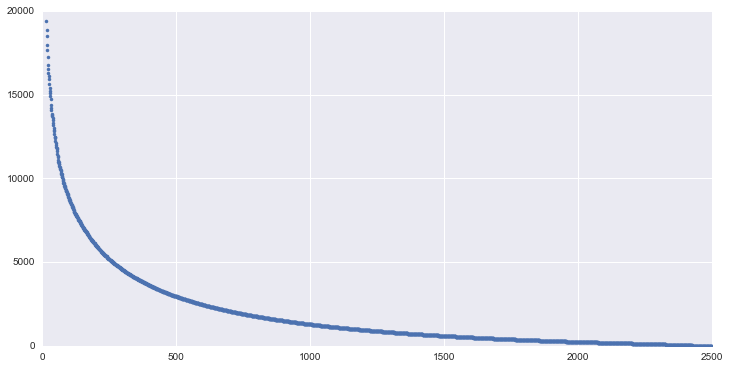

In [34]:
plt.figure(figsize= (12, 6))
plt.plot(energy, '.')
plt.ylim(0, 20000)

Rank of the array is the number of SVD singular values of the array that are greater than tol parameter

In [35]:
np.linalg.matrix_rank(mainmatrix)

2440

#### Reducing features


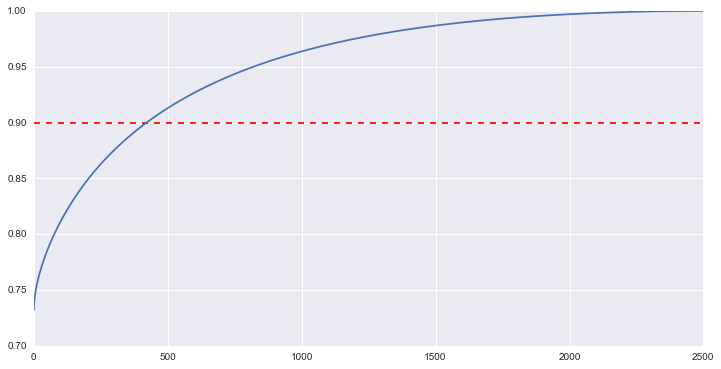

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(energy)/sum(energy))
plt.hlines(0.9, *plt.gca().get_xlim(), linestyle='dashed', color='red');


In [37]:
features_variance = np.cumsum(energy)/sum(energy)

In [38]:
reduction = features_variance > 0.9

In [39]:
reduction = 2500 - np.sum(features_variance > 0.9)
reduction

421

In [40]:
np.argmax(np.cumsum(energy) >= power*.9)

421

90% of the variance $\sigma^2$ is contained in 421 features, 441 concepts accounts for 90% of the energy.

422 - adjusting for error

In [41]:
sum((sigma**2)[:422])/sum((sigma**2))

0.90005748473458003

## Concep, Topic space

- mainmatrix : (__m__ x __n__)


- $U$ rows connects Users to Concepts (__m__ x __k__)


- $V^T$ rows connects Concept to Books (__k__ x __n__)

$U$ and $V^T$ are ortogonal matrices 

## keep 10 topics

$U$ and $V^T$ are ortogonal matrices 

```
V_10 = VT[:10,:]   # Rows

U_10 = U[:,:10]    # Columns
```

In [42]:
u.shape

(2500, 2500)

In [43]:
mainmatrix.shape

(2500, 6092)

In [44]:
v_t.shape

(2500, 6092)

#### Let's keep 450 books for the ~90% of the total energy

In [113]:
print u[:, :450].shape
u[:, :450]

(2500, 450)


array([[ -2.03009199e-02,   1.46995600e-03,  -5.51468665e-03, ...,
         -7.88916551e-03,   2.60467464e-02,   1.42720241e-02],
       [ -2.00591181e-02,   3.41022036e-03,  -4.42233141e-03, ...,
          1.56383075e-03,  -2.62887225e-02,   1.64118668e-02],
       [ -2.01392464e-02,  -2.41072849e-03,  -2.25175391e-04, ...,
         -1.87033543e-02,   3.73306251e-02,  -2.67488883e-02],
       ..., 
       [ -2.02847751e-02,  -1.89776666e-03,   4.08550795e-03, ...,
          6.90450059e-03,   9.96425482e-03,  -3.97038796e-03],
       [ -2.00238756e-02,   1.86895879e-03,  -5.94084427e-03, ...,
          1.73168086e-02,   3.16512793e-02,  -1.98812019e-02],
       [ -2.03539484e-02,   1.44039262e-03,  -7.90382567e-05, ...,
         -1.52153672e-02,   1.96520703e-03,  -1.65535344e-03]])

In [115]:
print v_t[:450, :].shape
v_t[:450, :]

(450, 6092)


array([[ 0.0130985 ,  0.01284511,  0.01323676, ...,  0.01323676,
         0.01323676,  0.01323676],
       [-0.00928497,  0.01717979, -0.00928893, ..., -0.00928893,
        -0.00928893, -0.00928893],
       [-0.00297272, -0.00468291, -0.00273579, ..., -0.00273579,
        -0.00273579, -0.00273579],
       ..., 
       [ 0.00015091,  0.02218852,  0.00015301, ...,  0.00015301,
         0.00015301,  0.00015301],
       [ 0.01013115,  0.00474572,  0.00021316, ...,  0.00021316,
         0.00021316,  0.00021316],
       [-0.00165844,  0.00646045,  0.00027946, ...,  0.00027946,
         0.00027946,  0.00027946]])

### Concepts /  Topics
#### Obtain $V^T$ column index

#### Selecting Concept (Topic) 

Concept number : 0

#### Selecting and Sorting the first row : 
```
Concept 0  =  Sort to obtain how much of each item/rating(column from mainmatrix) contributes to the latent features.

[-5:] # Selecting top 5 items

[::-1] # Descending order : mayor to lower to obtain the mayor contributors to the latent features```

In [73]:
# Obtain v_t columns index from the top 5 items
# Obtain V^T column index
concept_0 = v_t[0].argsort()[-5:][::-1]
concept_0

array([5961, 6034, 6087, 6070, 6029])


$A_k$ : MainMatrix

$S_k$ : Sigma

$A_k$ = $U_k$  $S_k$  $V_k^T$

* __m__: # of users
* __n__: # of items
* __k__: # of latent features (also rank of __A__)


* $A_k$ is our user-book rating matrix (__m__ x __n__)

    * **U** is our _weights_ matrix (__m__ x __k__)
    * **S** is our singular values matrix (__k__ x __k__)
    * and **V*** is our features matrix (__k__ x __n__)

#### Apply $V^T$ column index to the column mainmatrix in order to obtain the Top Ratings : Top n : Top items, Top features, from:

- mainmatrix : (__m__ x __n__)


```From v_t column index now I select the columns from main matrix that are most related to the concept 0```

In [71]:
mainmatrix.columns[concept_0]

Index([u'1841721522', u'3423105518', u'8807813025', u'3548603203',
       u'3379015180'],
      dtype='object', name=u'ISBN')

In [54]:
data = pd.read_csv('data/book_meta.csv', sep=";", error_bad_lines=False, low_memory=False
                       ).drop(['two', 'three'], axis=1)

In [55]:
data[:2]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
ISBN                   271379 non-null object
Book-Title             271379 non-null object
Book-Author            271379 non-null object
Year-Of-Publication    271379 non-null object
Publisher              271377 non-null object
Image-URL-S            271379 non-null object
Image-URL-M            271379 non-null object
Image-URL-L            271376 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


#### BOOKS 

- Books Index and Title

In [58]:
book_names = data.set_index('ISBN')['Book-Title']
book_names[:4]

ISBN
0195153448                                  Classical Mythology
0002005018                                         Clara Callan
0060973129                                 Decision in Normandy
0374157065    Flu: The Story of the Great Influenza Pandemic...
Name: Book-Title, dtype: object

In [72]:
book_names['0195153448']

'Classical Mythology'

#### Connecting Concept to Books

- $V^T$ rows connects Concept to Books (__k__ x __n__)

In [69]:
# Descending order : mayor to lower
topbooks_index = v_t[0].argsort()[-10:][::-1]
print len(topbooks_index)
topbooks_index

10


array([5961, 6034, 6087, 6070, 6029, 6020, 2298, 6088, 6021, 6027])

In [68]:
mainmatrix.columns[topbooks_index]

Index([u'1841721522', u'3423105518', u'8807813025', u'3548603203',
       u'3379015180', u'3250600555', u'042516019X', u'8817106100',
       u'3257061269', u'3257229364'],
      dtype='object', name=u'ISBN')

#### book_names :  Index 'ISBN'  >>   ['Book-Title']
- mainmatrix : (__m__ x __n__)

* __m__: # of User-ID
* __n__: # of ISBN

- *__Top ISBN by User__*: Top Rating by User:  mainmatrix.columns[topconcept_index]

In [ ]:
# mainmatrix : 
def topbooks_bytopic(mainmatrix, v_t, concep=0, booklist_qty=5):
    topconcept_index = v_t[concept].argsort()[-book_qty:][::-1]
    topbook_indexes = book_names[mainmatrix.columns[topconcept_index]]
        

In [258]:
def top_book_for_topic(mainmatrix, v_t, concept=0, books_qty=10):
    #print 'Concept: ', concept
    book_relevance_index = v_t[concept].argsort()[-books_qty:][::-1]
    top_index = book_names[mainmatrix.columns[book_relevance_index]]
    return top_index

In [259]:

for i in range(concepts):
    print 'Concept: {}'.format(i)
    print top_book_for_topic(mainmatrix, v_t, concept=i, books_qty=10)
    print ''
    

Concept: 0
ISBN
1841721522    New Vegetarian: Bold and Beautiful Recipes for...
3423105518                                        Name Der Rose
8807813025                               Novocento, Un Monologo
3548603203                                        Artemis Fowl.
3379015180                                      Schlafes Bruder
3250600555    Monsieur Ibrahim und die Blumen des Koran. Erz...
042516019X                                           Masquerade
8817106100                                          Oceano Mare
3257061269                                       Der Alchimist.
3257229364    Endstation Venedig. Commissario Brunettis zwei...
Name: Book-Title, dtype: object

Concept: 1
ISBN
0312195516                  The Red Tent (Bestselling Backlist)
0385504209                                    The Da Vinci Code
0446672211    Where the Heart Is (Oprah's Book Club (Paperba...
0316666343                            The Lovely Bones: A Novel
0671001795                             

In [242]:
def get_concept_to_book(mainmatrix, v_t, concept=0, count=10):
    book_index = v_t[concept].argsort()[::-1][0:count] # Descending order mayor to lower
    return book_names[mainmatrix.columns[book_index]]

In [243]:
get_concept_to_book(mainmatrix, v_t, concept=0, count=10)

ISBN
1841721522    New Vegetarian: Bold and Beautiful Recipes for...
3423105518                                        Name Der Rose
8807813025                               Novocento, Un Monologo
3548603203                                        Artemis Fowl.
3379015180                                      Schlafes Bruder
3250600555    Monsieur Ibrahim und die Blumen des Koran. Erz...
042516019X                                           Masquerade
8817106100                                          Oceano Mare
3257061269                                       Der Alchimist.
3257229364    Endstation Venedig. Commissario Brunettis zwei...
Name: Book-Title, dtype: object

#### Top ten books for 3 concepts ( Topics)

In [244]:
#  450 concepts(topics) accounts for 90% of the energy(Variance)
# concepts = 450
concepts = 3

for i in range(concepts):
    print 'Concept: {}'.format(i)
    print get_concept_to_book(mainmatrix, v_t, concept=i, count=10)
    print ''
    

    

Concept: 0
ISBN
1841721522    New Vegetarian: Bold and Beautiful Recipes for...
3423105518                                        Name Der Rose
8807813025                               Novocento, Un Monologo
3548603203                                        Artemis Fowl.
3379015180                                      Schlafes Bruder
3250600555    Monsieur Ibrahim und die Blumen des Koran. Erz...
042516019X                                           Masquerade
8817106100                                          Oceano Mare
3257061269                                       Der Alchimist.
3257229364    Endstation Venedig. Commissario Brunettis zwei...
Name: Book-Title, dtype: object

Concept: 1
ISBN
0312195516                  The Red Tent (Bestselling Backlist)
0385504209                                    The Da Vinci Code
0446672211    Where the Heart Is (Oprah's Book Club (Paperba...
0316666343                            The Lovely Bones: A Novel
0671001795                             

#### Inference

Concept : Topic 0, Mistery novel

Concept : Topic 1, Fantasy

Concept : Topic 2, Drama

.

.

.

Concept : Topic 450, ....just for fun. 

### User - Concept

In [165]:
u.shape

(2500, 2500)

In [245]:
user_zero = np.argsort(u[0, :])[::-1][:10]
user_zero

array([2112, 2000, 2101, 2120, 1987, 2260, 2182, 1901, 1939, 1842])

In [246]:
u[0, :][user_zero]

array([ 0.07613065,  0.07610656,  0.07291647,  0.07263817,  0.07219715,
        0.06875815,  0.06827144,  0.06807802,  0.0675759 ,  0.06671843])

In [248]:
top_index = []
for i in user_zero:
    top_index.append(np.argsort(v_t[i, :])[::-1][:3])
    
top_index

[array([ 661, 2786,  610]),
 array([2981, 4484, 3891]),
 array([4647, 4387, 1407]),
 array([5948, 4624, 1489]),
 array([ 190, 3534, 3256]),
 array([2748, 2429, 3583]),
 array([3698, 2161, 4508]),
 array([ 674, 5375, 5299]),
 array([1684, 3953, 4418]),
 array([4028,  616, 5791])]

In [249]:
book_user_index = []
concepts = 3

for i in range(concepts):
    book_user_index.append(mainmatrix.columns[top_index[i]].values)
book_user_index

[array(['0151001006', '0441003389', '0140440410'], dtype=object),
 array(['0446603104', '0670853097', '0553212451'], dtype=object),
 array(['0671510126', '0590477404', '0374281602'], dtype=object)]

In [250]:
for concept, book_index in enumerate(book_user_index):
    print 'concept{} : Top 3 recomenders for user zero\n'.format(concept)
    for index in book_index:
        try:
            title = data[data.ISBN == index]['Book-Title'].values[0]
        except:
            title = 'Unknown title'
        print title
    print '\n'
        

concept0 : Top 3 recomenders for user zero

Snow Falling on Cedars
Freedom's Landing
Anna Karenina (Penguin Classics)


concept1 : Top 3 recomenders for user zero

Seduction by Design
The Stone Diaries
The Jungle (Bantam Classics)


concept2 : Top 3 recomenders for user zero

The Good Earth (Enriched Classics)
Monster Blood II (Goosebumps, No 18)
Reversible Errors: A Novel




- According to the book recommendation user zero might be  ....

In [166]:
u_reduced = u[:, :450]
sigma_reduced = sigma[:450]
v_t_reduced = v_t[:450]

In [170]:
matrix_recontruction = (u_reduced*sigma_reduced).dot(v_t_reduced)
matrix_recontruction

array([[-0.95744986, -1.10020907, -1.0012361 , ..., -1.0012361 ,
        -1.0012361 , -1.0012361 ],
       [-1.14121559, -1.18631704, -1.0228987 , ..., -1.0228987 ,
        -1.0228987 , -1.0228987 ],
       [-0.99645468, -0.85329675, -0.99015955, ..., -0.99015955,
        -0.99015955, -0.99015955],
       ..., 
       [-0.97749502, -0.93852378, -1.00563909, ..., -1.00563909,
        -1.00563909, -1.00563909],
       [-0.7848654 , -1.0411863 , -0.98659292, ..., -0.98659292,
        -0.98659292, -0.98659292],
       [-1.07210139, -0.82444039, -1.01193158, ..., -1.01193158,
        -1.01193158, -1.01193158]])